# Problem Set 1

Nima Nikopour

In [1]:
import numpy as np
from scipy.special import gammaincc, gamma
from scipy.optimize import brentq
import matplotlib.pyplot as plt

## 1.1(b)

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_1880/3128560017.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Aggregate Labor Market ($\lambda={lam}$)')


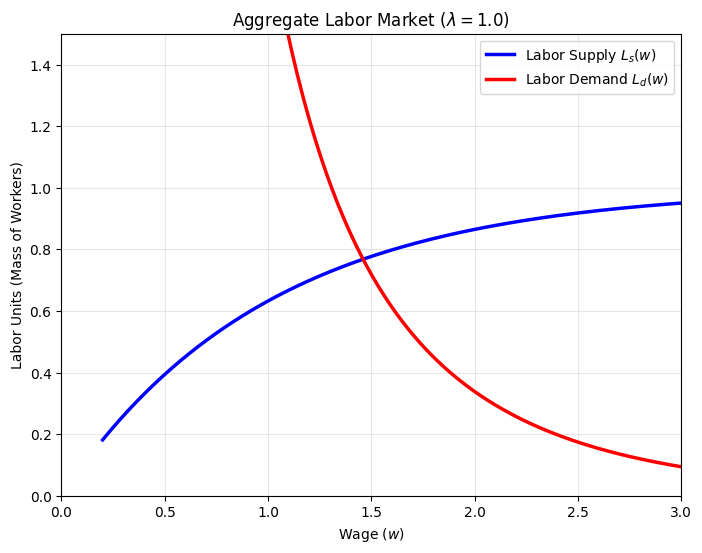

In [ ]:
# 1. Setup
lam = 1.0
w = np.linspace(0.2, 3.0, 200) # Start slightly higher to avoid the massive spike

# 2. Define Formulas
L_s = 1 - np.exp(-lam * w)
L_d = (1 / (lam * w)**2) * (gamma(3) * gammaincc(3, lam * w))

# 3. Create the Graph
plt.figure(figsize=(8, 6))

plt.plot(w, L_s, label=r'Labor Supply $L_s(w)$', color='blue', linewidth=2.5)
plt.plot(w, L_d, label=r'Labor Demand $L_d(w)$', color='red', linewidth=2.5)

# ZOOM IN 
plt.ylim(0, 1.5)  # Cut off the infinity spike so we can see the crossing
plt.xlim(0, 3)

plt.title(f'Aggregate Labor Market ($\lambda={lam}$)')
plt.xlabel('Wage ($w$)')
plt.ylabel('Labor Units (Mass of Workers)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.savefig('1b_graph.png', dpi=300)
plt.show()

## 1.2

In [ ]:

# Define Market Functions (nu = 0.5 implicitly)
def labor_supply(w, lam):
    return 1 - np.exp(-lam * w)

def labor_demand(w, lam):
    # Formula: (1 / (lam*w)^2) * Gamma(3, lam*w)
    # multiply by gamma(3) because scipy's gammaincc is normalized
    return (1 / (lam * w)**2) * (gamma(3) * gammaincc(3, lam * w))

def excess_demand(w, lam):
    return labor_demand(w, lam) - labor_supply(w, lam)

# 2. Solve for Lambda = 1, 2, 3
lambdas = [1, 2, 3]

print(f"{'Lambda':<10} | {'Wage (w*)':<15} | {'Threshold (z*)':<15} | {'% Workers':<15}")
print("-" * 65)

for lam in lambdas:
    # Find the root where Supply = Demand
    w_star = brentq(excess_demand, 0.001, 10.0, args=(lam,))
    
    # Calculate % of population that are workers
    percent_workers = labor_supply(w_star, lam) * 100
    
    # Note: In the baseline model, z* = w*
    print(f"{lam:<10} | {w_star:<15.4f} | {w_star:<15.4f} | {percent_workers:<15.2f}%")



Lambda     | Wage (w*)       | Threshold (z*)  | % Workers      
-----------------------------------------------------------------
1          | 1.4603          | 1.4603          | 76.78          %
2          | 0.7302          | 0.7302          | 76.78          %
3          | 0.4868          | 0.4868          | 76.78          %


## 1.4

### Recreating Plot

--- Results for General Model (nu=0.85) ---
Lambda     | Wage (w*)       | Threshold (z*)  | % Workers      
-----------------------------------------------------------------
1          | 3.2184          | 4.1748          | 98.46          %
2          | 1.6092          | 2.0874          | 98.46          %
3          | 1.0728          | 1.3916          | 98.46          %

Graph saved as 'q4_graph.png'


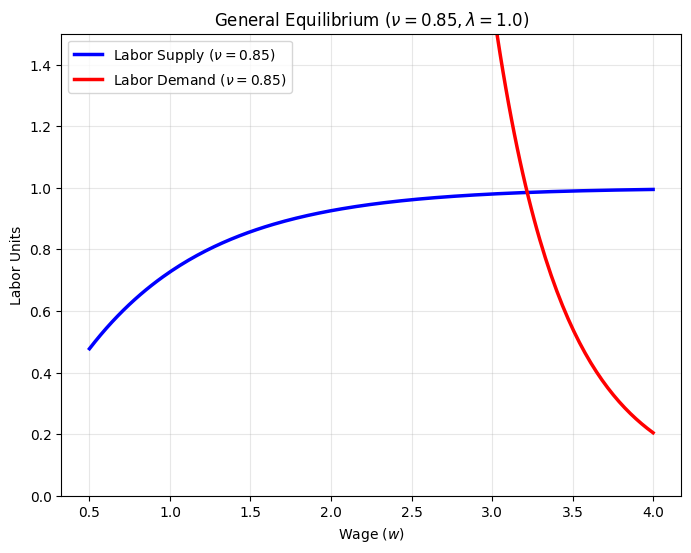

In [5]:
# 1. Setup Shared Parameters
nu = 0.85
k = 1 / (1 - nu)           # Power on z in the integral
s_param = k + 1            # Gamma parameter
thresh_factor = (nu / (1 - nu))**(1 - nu) # Relates z* to w

# 2. Define Market Functions
def labor_supply(w, lam):
    z_star = w * thresh_factor
    return 1 - np.exp(-lam * z_star)

def labor_demand(w, lam):
    z_star = w * thresh_factor
    # General Gamma Formula: Ld = [1 / (lam*w)^k] * Gamma(s, lam*z*)
    # Multiply by gamma(s) because scipy's gammaincc is normalized
    gamma_val = gamma(s_param) * gammaincc(s_param, lam * z_star)
    denom = (lam * w)**k
    return gamma_val / denom

def excess_demand(w, lam):
    return labor_demand(w, lam) - labor_supply(w, lam)

# 3. Solve for Lambda = 1, 2, 3
lambdas = [1, 2, 3]

print(f"--- Results for General Model (nu={nu}) ---")
print(f"{'Lambda':<10} | {'Wage (w*)':<15} | {'Threshold (z*)':<15} | {'% Workers':<15}")
print("-" * 65)

for lam in lambdas:
    # Find equilibrium wage
    w_star = brentq(excess_demand, 0.001, 10.0, args=(lam,))
    
    # Calculate derived values
    z_star_val = w_star * thresh_factor
    percent_workers = labor_supply(w_star, lam) * 100
    
    print(f"{lam:<10} | {w_star:<15.4f} | {z_star_val:<15.4f} | {percent_workers:<15.2f}%")

# 4. Plot and Save Graph (for Lambda = 1)
lam_plot = 1.0
w_plot = np.linspace(0.5, 4.0, 200)

plt.figure(figsize=(8, 6))

# Calculate curves
L_s = labor_supply(w_plot, lam_plot)
L_d = labor_demand(w_plot, lam_plot)

# Plot
plt.plot(w_plot, L_s, label=f'Labor Supply ($\\nu={nu}$)', color='blue', linewidth=2.5)
plt.plot(w_plot, L_d, label=f'Labor Demand ($\\nu={nu}$)', color='red', linewidth=2.5)

# Visuals
plt.ylim(0, 1.5)
plt.title(f'General Equilibrium ($\\nu={nu}, \\lambda={lam_plot}$)')
plt.xlabel('Wage ($w$)')
plt.ylabel('Labor Units')
plt.legend()
plt.grid(True, alpha=0.3)

# Save and Show
plt.savefig('q4_graph.png', dpi=300)
print("\nGraph saved as 'q4_graph.png'")
plt.show()

Note: In accordance with university policy, I state that generative AI was used in this assignment strictly for code debugging and mathematical verification. All analysis is original.